# Zadanie 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 2
n = 10000
h = np.arange(-20, 21)
#h = -4


def theo_cov(sigma, h):
    if h == 0:
        return sigma
    else:
        return 0


def emp_cov(sigma, h, n):

    X = np.random.normal(0, sigma, n)
    X_sr = np.mean(X)
    X_t = X[:-np.abs(h)]
    X_t_h = X[np.abs(h):]
    
    if h == 0:
        return (1 / n) * np.sum((X - X_sr)*(X - X_sr))
    else:
        return (1 / n) * np.sum((X_t - X_sr)*(X_t_h - X_sr))

In [2]:
dane_theo_cov = []
for i in h:
    dane_theo_cov.append(theo_cov(sigma,i))
    
dane_emp_cov = []
for j in h:
    dane_emp_cov.append((emp_cov(sigma,j,n)))

41


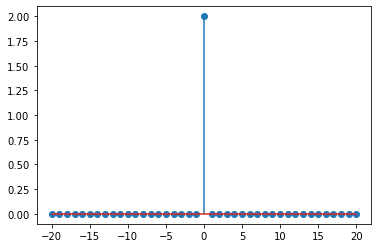

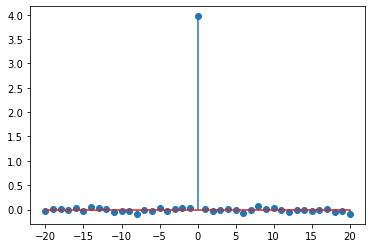

In [3]:
x = np.linspace(min(h), max(h), len(h))
print(len(x))

plt.stem(x, dane_theo_cov)
plt.show()

plt.stem(x, dane_emp_cov)
plt.show()

# Zadanie 4

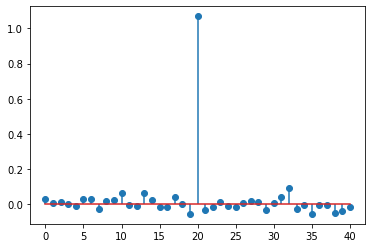

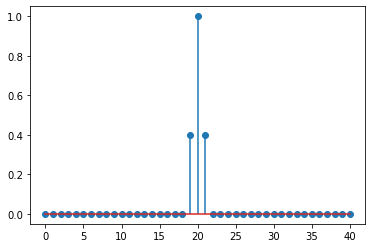

In [13]:
import numpy as np

sigma = 2
n = 1000
teta = 0.5

Z = np.random.normal(0,sigma,n)

X = []
for i in range(n-1):
    X.append(Z[i+1] + teta*Z[i])


    
h = np.arange(-20, 21)
def emp_cov(sigma, h, n):

    X = np.random.normal(0, sigma, n)
    X_sr = np.mean(X)
    X_t = X[:-np.abs(h)]
    X_t_h = X[np.abs(h):]
    
    if h == 0:
        return (1 / n) * np.sum((X - X_sr)*(X - X_sr))
    else:
        return (1 / n) * np.sum((X_t - X_sr)*(X_t_h - X_sr))
    
dane_emp_cov = []
for j in h:
    dane_emp_cov.append((emp_cov(sigma,j,n)))

    
def ro_x(h,teta):
    if h == 0:
        return 1
    elif h == 1 or h == -1:
        return teta/(1+teta**2)
    else:
        return 0

    
ro_x_emp = []
for k in h:
    ro_x_emp.append(ro_x(k,teta))   

    
ro_x_est = []    
for j in h:
    ro_x_est.append(emp_cov(sigma,j,n)/emp_cov(sigma,0,n))
    
plt.stem(ro_x_est)
plt.show()

plt.stem(ro_x_emp)
plt.show()

# Zadanie 5

Teoretyczna autokorelacja: [1, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Klasyczna autokorelacja: [1.0, 0.4120620254561084, 0.011437539211441961, 0.0031070354879121674, 0.004240217968920896, 0.006475479962885557, 0.019627509240365482, 0.024277947988529346, 0.009384091665003006, 0.04401091123726011, 0.03610470744765292] 

Kwadrantowa autokorelacja: [1.0, 0.4047246568282735, -0.025180445720138524, 0.03937788860153773, -0.018924127241019006, 0.014207729943210802, 0.018962199396031876, 0.011072859605699866, -0.034829163307884964, 0.0332801531527516, 0.02855605079369625]


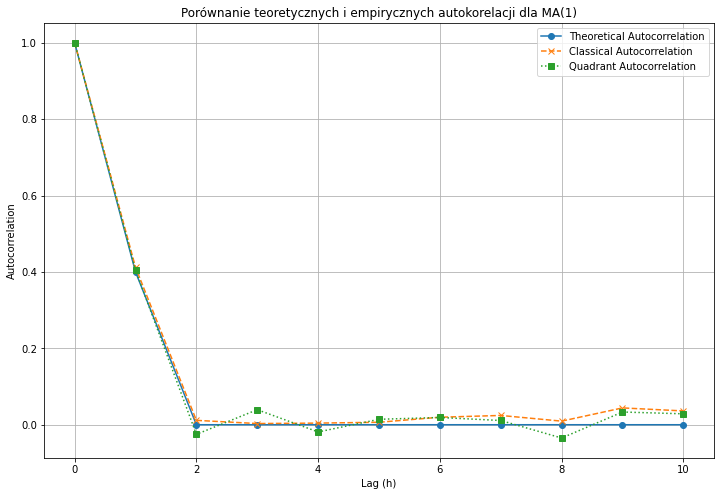

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau

# Generowanie danych
#----------------------------------------------------

n = 1000
theta = 0.5
Z = np.random.normal(0, 1, n)

X = np.zeros(n)

for t in range(1, n):
    X[t] = Z[t] + theta * Z[t-1]

# Autokorelacje

#------------------------------------------------------        
def theoretical_autocorrelation(theta, h):
    if h == 0:
        return 1
    elif h == 1:
        return theta / (1 + theta**2)
    else:
        return 0

theta = 0.5
theoretical_rho = [theoretical_autocorrelation(theta, h) for h in range(11)]
print(f"Teoretyczna autokorelacja: {theoretical_rho}",'\n')

#-------------------------------------------------------
def classical_autocorrelation(x, h):
    mean_x = np.mean(x)
    n = len(x)
    licznik = sum((x[i] - mean_x) * (x[i+h] - mean_x) for i in range(n - h))
    mianownik = sum((x[i] - mean_x)**2 for i in range(n))
    return licznik / mianownik

classical_rho = [classical_autocorrelation(X, h) for h in range(11)]
print(f"Klasyczna autokorelacja: {classical_rho}", '\n')

#--------------------------------------------------------
def Quadrant_autocorrelation(x, h):
    n = len(x)
    mi = np.median(x)
    ro_x_sum = sum(np.sign((x[i] - mi)*(x[i+h]-mi)) for i in range(n - h))
    ro_x = (1 / (n-h)) * ro_x_sum 
    ro_x_est = np.sin((np.pi*ro_x) / 2)
    return ro_x_est

quadrant_rho = [quadrant_autocorrelation(X, h) for h in range(11)]
print(f"Kwadrantowa autokorelacja: {quadrant_rho}")

plt.figure(figsize=(12, 8))
plt.plot(theoretical_rho, marker='o', label="Theoretical Autocorrelation")
plt.plot(classical_rho, marker='x', linestyle='--', label="Classical Autocorrelation")
plt.plot(quadrant_rho, marker='s', linestyle=':', label="Quadrant Autocorrelation")
plt.title("Porównanie teoretycznych i empirycznych autokorelacji dla MA(1)")
plt.xlabel("Lag (h)")
plt.ylabel("Autocorrelation")
plt.legend()
plt.grid(True)
plt.show()

Teoretyczna autokorelacja: [1, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Klasyczna autokorelacja: [1.0, 0.06392078730485118, -0.005159525582660235, 0.04317207083133107, 0.05094100502240953, 0.07563492958438695, 0.043115111886072886, 0.013211415371075917, 0.026672047789018178, 0.06488811744437445, 0.05748188986593827] 

Kwadrantowa autokorelacja: [1.0, 0.3960797660391568, 0.0409111286930428, -0.03937788860153773, 0.022077672517526743, 0.13065662307895898, 0.04423334672537886, -0.02372581469288477, -0.028498493717621178, 0.061778049553723784, 0.09821451624303712]


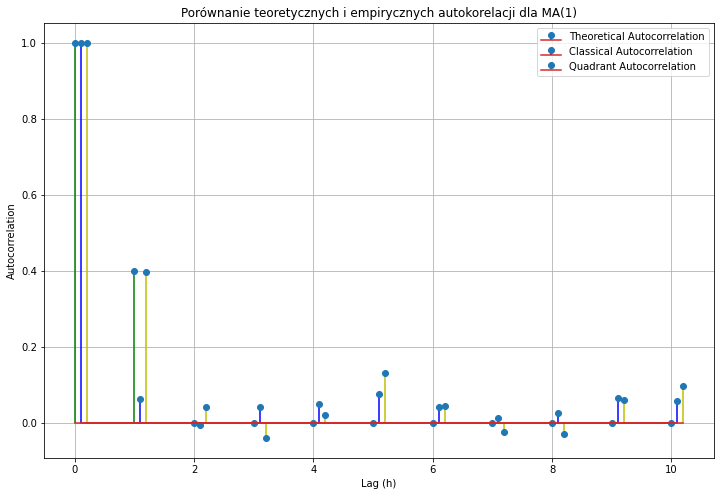

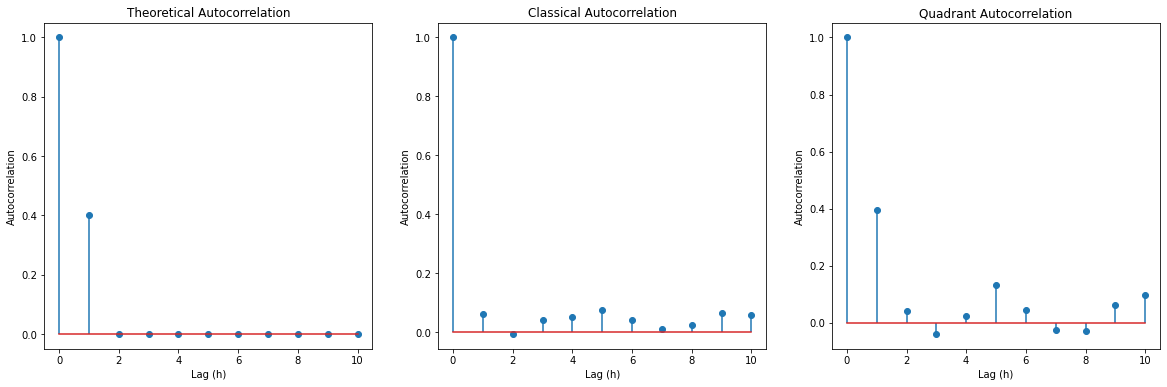

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau

# Generowanie danych
#----------------------------------------------------

n = 1000
theta = 0.5
Z = np.random.normal(0, 1, n)

X = np.zeros(n)

for t in range(1, n):
    X[t] = Z[t] + theta * Z[t-1]

    
# Generowanie E_t    
a = 15
p = 0.02

choices = [-a, 0, a]
probabilities = [p/2, 1-p, p/2]
E_t = np.random.choice(choices, n, p=probabilities)

X_mod = X + E_t


# Autokorelacje

#------------------------------------------------------        
def theoretical_autocorrelation(theta, h):
    if h == 0:
        return 1
    elif h == 1:
        return theta / (1 + theta**2)
    else:
        return 0

theta = 0.5
theoretical_rho = [theoretical_autocorrelation(theta, h) for h in range(11)]
print(f"Teoretyczna autokorelacja: {theoretical_rho}",'\n')

#-------------------------------------------------------
def classical_autocorrelation(x, h):
    mean_x = np.mean(x)
    n = len(x)
    licznik = sum((x[i] - mean_x) * (x[i+h] - mean_x) for i in range(n - h))
    mianownik = sum((x[i] - mean_x)**2 for i in range(n))
    return licznik / mianownik

classical_rho = [classical_autocorrelation(X_mod, h) for h in range(11)]
print(f"Klasyczna autokorelacja: {classical_rho}", '\n')

#--------------------------------------------------------
def Quadrant_autocorrelation(x, h):
    n = len(x)
    mi = np.median(x)
    ro_x_sum = sum(np.sign((x[i] - mi)*(x[i+h]-mi)) for i in range(n - h))
    ro_x = (1 / (n-h)) * ro_x_sum 
    ro_x_est = np.sin((np.pi*ro_x) / 2)
    return ro_x_est

quadrant_rho = [Quadrant_autocorrelation(X_mod, h) for h in range(11)]
print(f"Kwadrantowa autokorelacja: {quadrant_rho}")

h = np.arange(0,11)

plt.figure(figsize=(12, 8))
#plt.plot(theoretical_rho, marker='o', label="Theoretical Autocorrelation")
#plt.plot(classical_rho, marker='x', linestyle='--', label="Classical Autocorrelation")
#plt.plot(quadrant_rho, marker='s', linestyle=':', label="Quadrant Autocorrelation")

plt.stem(h,theoretical_rho, "g", label = "Theoretical Autocorrelation")
plt.stem(h+0.1,classical_rho, "b", label = "Classical Autocorrelation")
plt.stem(h+0.2,quadrant_rho, "y", label = "Quadrant Autocorrelation")
plt.title("Porównanie teoretycznych i empirycznych autokorelacji dla MA(1)")
plt.xlabel("Lag (h)")
plt.ylabel("Autocorrelation")
plt.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(1,3,figsize=(20,6))
ax[0].stem(theoretical_rho)
ax[0].set_title("Theoretical Autocorrelation")
ax[0].set_xlabel("Lag (h)")
ax[0].set_ylabel("Autocorrelation")
ax[1].stem(classical_rho)
ax[1].set_title("Classical Autocorrelation")
ax[1].set_xlabel("Lag (h)")
ax[1].set_ylabel("Autocorrelation")
ax[2].stem(quadrant_rho)
ax[2].set_title("Quadrant Autocorrelation")
ax[2].set_xlabel("Lag (h)")
ax[2].set_ylabel("Autocorrelation")
plt.show()